## Executive Summary


This is an implementation of the Convolutional Neural Networks (CNN) to recognize the Baybayin (a pre-colonial script used by Filipinos) handwritten symbols from images. Please note that the hyperparameters of this model is not yet optimized. The purpose of this notebook is not to create the most optimal model but to demonstrate how we can use CNN to classify our own set of images.

## Load libraries

In [179]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

## Set path to images
A total of **36,000 handwritten Baybayin images** were obtained from https://data.mendeley.com/datasets/j6cgcfys77/1. It has 17 signs representing 14 consonants which composed of ba, da, ka, ga, la, ha, ma, nga, na, sa, pa, wa, ya, ta. This will be the target labels of our model.

In [26]:
path1 = '/Users/ginoasuncion/Downloads/original' #path of folder of images    
path2 = '/Users/ginoasuncion/Downloads/original/preprocessed' #path of folder to save images    

In [378]:
listing = ['ga', 'ma', 'na', 'dara', 'a', 'ya', 'sa', 'pa', 'ba', 'ha', 'ka', 'nga', 'ei', 'ou', 'la', 'ta', 'wa']
num_samples = size(listing)
print(num_samples)

17


## Preprocess
Here, we resized and converted each image to gray scale. We also dumped all the preprocessed photos into one directory.

In [30]:
img_rows, img_cols = 200, 200 # input image dimensions
img_channels = 1 # number of channels

for folder in listing:
    for file in os.listdir(f'{path1}/{folder}/'):
        im = Image.open(f'{path1}/{folder}/{file}')   
        img = im.resize((img_rows,img_cols))
        gray = img.convert('L')         
        gray.save(path2 +'/' +  file, "JPEG")

Sample image

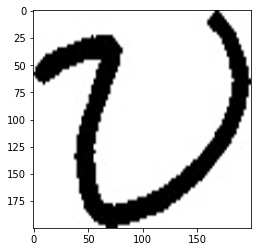

In [384]:
plt.imshow(img)
plt.imshow(img,cmap='gray')
plt.show()

Each preprocessed image was then flattened and stored into one variable.

In [34]:
imlist = os.listdir(path2)

im1 = array(Image.open(path2 + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

print(imnbr, m, n)

36000 200 200


In [35]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2 + '/' + im2)).flatten() for im2 in imlist],'f')

Numerical values was then assigned to each class.

In [52]:
label_ = [im2.split('_')[0] for im2 in imlist]

labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label_)

Here, we shuffled the order of the images to remove the potential bias during splitting of training and test sets.

In [53]:
data, Label = shuffle(immatrix,label, random_state=2)
train_data = [data, Label]

Dataset was then divided into train and test sets.

In [161]:
(X, y) = (train_data[0],train_data[1])

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
# X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (28800, 200, 200, 1)
28800 train samples
7200 test samples


The classes were then converted into one-hot encoded values.

In [231]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Train model

We set the hyperparameters of our model.

In [ ]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 17
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 18

This is the model architecture.

In [187]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size=3, input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

We created checkpoints to continuosly train our model.

In [188]:
# define the checkpoint
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [189]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Epoch 1/20
900/900 [==============================] - 291s 322ms/step - loss: 2.8412 - accuracy: 0.0609 - val_loss: 2.8188 - val_accuracy: 0.0936

Epoch 00001: loss improved from inf to 2.83538, saving model to model.h5
Epoch 2/20
900/900 [==============================] - 281s 311ms/step - loss: 2.8248 - accuracy: 0.0734 - val_loss: 2.8122 - val_accuracy: 0.1122

Epoch 00002: loss improved from 2.83538 to 2.82395, saving model to model.h5
Epoch 3/20
900/900 [==============================] - 277s 308ms/step - loss: 2.8202 - accuracy: 0.0752 - val_loss: 2.8056 - val_accuracy: 0.1374

Epoch 00003: loss improved from 2.82395 to 2.81834, saving model to model.h5
Epoch 4/20
900/900 [==============================] - 270s 299ms/step - loss: 2.8141 - accuracy: 0.0857 - val_loss: 2.7983 - val_accuracy: 0.1501

Epoch 00004: loss improved from 2.81834 to 2.81319, saving model to model.h5
Epoch 5/20
900/900 [==============================] - 266s 296ms/step - loss: 2.8065 - accuracy: 0.0924 - va

We can see here that our model was able to improve its predictive performance over time but it still needs more training and hyperparamter tuning.

## Predict using the trained model

Use model to predict one image.

Predicted: ha
True label: ha


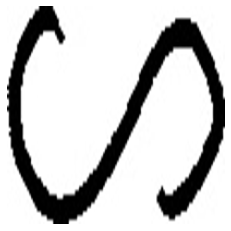

In [344]:
im = Image.open(f'{path1}/ha/ha_00001_file001.jpg')   
img = im.resize((img_rows,img_cols))
gray = img.convert('L')

fig, ax = plt.subplots()
plt.imshow(gray, cmap='gray')
plt.axis('off') 

img=np.array(gray).flatten().reshape(img_rows, img_cols)
new_image = img.reshape(1, img_cols, img_rows, 1)
new_image = new_image.astype('float32')
new_image /= 255

predict(new_image, 'ha', labelencoder)

Check prediction on sample image of each Baybayin character.

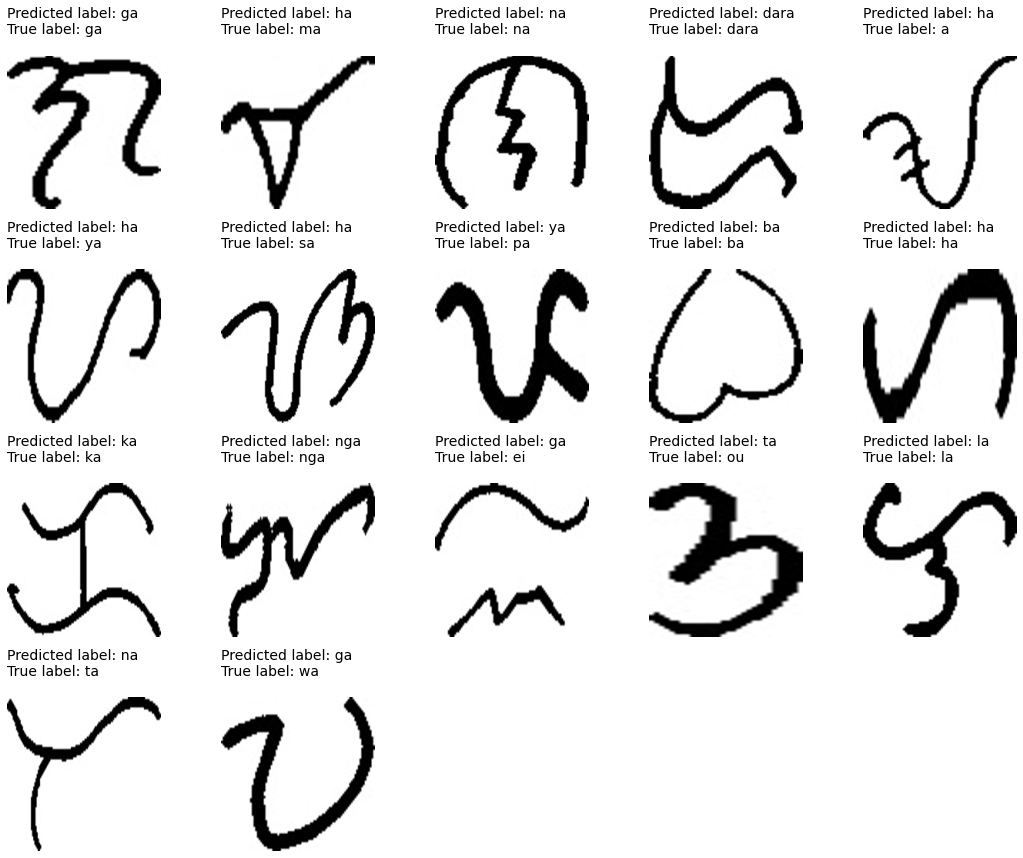

In [376]:
plt.figure(figsize=(15,15))

for idx, baybayin in enumerate(listing):
    
    input_image = os.listdir(f'{path1}/{baybayin}/')[0] 

    im = Image.open(f'{path1}/{baybayin}/{input_image}')   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    
    img=np.array(gray).flatten().reshape(img_rows, img_cols)
    new_image = img.reshape(1, img_cols, img_rows, 1)
    new_image = new_image.astype('float32')
    new_image /= 255
    
    predicted = np.argmax(model.predict(new_image.reshape(1, 200, 200, 1)))
    predicted = labelencoder.inverse_transform([predicted])[0]
    
    plt.subplot(5,5,idx+1)
    plt.imshow(gray, cmap='gray')
    plt.axis('off') 
    plt.title(f'Predicted label: {predicted}\nTrue label: {baybayin}\n', 
              fontsize=14, loc='left')
    
plt.tight_layout()   
plt.show()

Our model only classified 8 out of 17 Baybayin characters suggesting that we should continue to train this model more.